In [7]:
import sys
sys.path.append('../../misc/mmelo-misc')
from helpers import *

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [8]:
X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99,
                                                    random_state=42)

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
predictions = lr.predict_proba(X_test)
output = pd.DataFrame()
output['predictions'] = predictions[:,1]
output['labels'] = y_test
output.head()

,predictions,labels
0,0.970208,1
1,0.886231,0
2,0.989560,1
3,0.697806,1
4,0.000846,0


98931 98930 99000 [   70    71    72 ..., 98998 98999 99000]


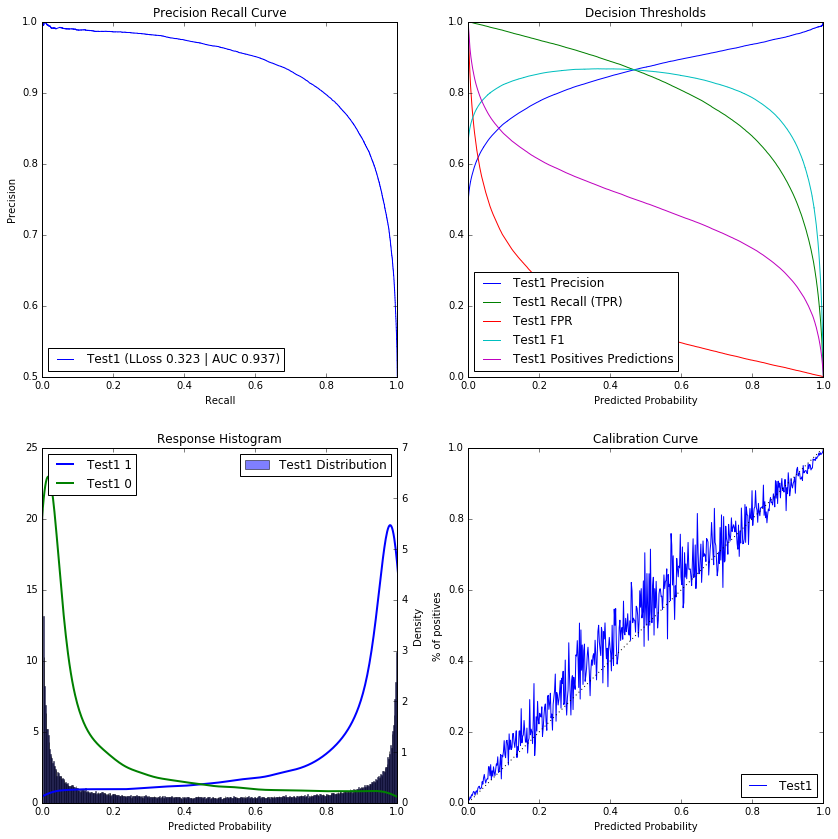

In [40]:
hlp.perf.classifier_performance(output, name='Test1', y_pred='predictions', y_true='labels')
# hlp.perf.save_fig('asd', close=False)